##  PROJET MACHINE LEARNING: PARTIE REGRESSION LINEAIRE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Charger le dataset
data = pd.read_csv(r'C:/Users/cinthia/OneDrive/Bureau/ProjetMachine_learning/Bank_Personal_Loan_Modelling.csv')

In [4]:
data.head()

,ID_Customer,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Prétraitement des données 
#affichage des variables cathégorielles 

var_cath = [col for col in data.columns if data[col].nunique() < 10 and col != 'Personal Loan']
print("Colonnes catégorielles potentielles:", var_cath)

Colonnes catégorielles potentielles: ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


## nos variables pris en compte sont Education et Family

In [6]:
# encodage des variables avec ONE-HOT-ENCODING 
# il permet d'encode nos variabme en 

data_encode = pd.get_dummies(data, columns=['Education', 'Family'])
print(data_encode.head())

   ID_Customer  Age  Experience  Income  ZIP Code  CCAvg  Mortgage  \
0            1   25           1      49     91107    1.6         0   
1            2   45          19      34     90089    1.5         0   
2            3   39          15      11     94720    1.0         0   
3            4   35           9     100     94112    2.7         0   
4            5   35           8      45     91330    1.0         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   Education_1  Education_2  Education_3  Family_1  Family_2  Family_3  \
0         True        False        False     False     False     False  

In [7]:
data_encode.to_csv('Bank_Personal_Loan_Modelling_encode.csv', index=False)

In [8]:
# Recategoriser les colonnes binaires pour 'Education'
data_encode['Education'] = data_encode[['Education_1', 'Education_2', 'Education_3']].idxmax(axis=1)
data_encode['Family'] = data_encode[['Family_1', 'Family_2', 'Family_3', 'Family_4']].idxmax(axis=1)

# Nettoyer les colonnes de type '_n' pour obtenir des valeurs comme '1', '2', etc.
data_encode['Education'] = data_encode['Education'].str.replace('Education_', '').astype(int)
data_encode['Family'] = data_encode['Family'].str.replace('Family_', '').astype(int)

# Supprimer les anciennes colonnes binaires
data = data_encode.drop(columns=[col for col in data.columns if col.startswith('Education_') or col.startswith('Family_')])

print(data)

      ID_Customer  Age  Experience  Income  ZIP Code  CCAvg  Mortgage  \
0               1   25           1      49     91107    1.6         0   
1               2   45          19      34     90089    1.5         0   
2               3   39          15      11     94720    1.0         0   
3               4   35           9     100     94112    2.7         0   
4               5   35           8      45     91330    1.0         0   
...           ...  ...         ...     ...       ...    ...       ...   
4995         4996   29           3      40     92697    1.9         0   
4996         4997   30           4      15     92037    0.4        85   
4997         4998   63          39      24     93023    0.3         0   
4998         4999   65          40      49     90034    0.5         0   
4999         5000   28           4      83     92612    0.8         0   

      Personal Loan  Securities Account  CD Account  ...  CreditCard  \
0                 0                   1           0

In [9]:
# Supprimer les colonnes spécifiques
data = data_encode.drop(columns=['Education_1', 'Education_2', 'Education_3', 'Family_1', 'Family_2', 'Family_3', 'Family_4'])
print(data)

      ID_Customer  Age  Experience  Income  ZIP Code  CCAvg  Mortgage  \
0               1   25           1      49     91107    1.6         0   
1               2   45          19      34     90089    1.5         0   
2               3   39          15      11     94720    1.0         0   
3               4   35           9     100     94112    2.7         0   
4               5   35           8      45     91330    1.0         0   
...           ...  ...         ...     ...       ...    ...       ...   
4995         4996   29           3      40     92697    1.9         0   
4996         4997   30           4      15     92037    0.4        85   
4997         4998   63          39      24     93023    0.3         0   
4998         4999   65          40      49     90034    0.5         0   
4999         5000   28           4      83     92612    0.8         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1         

# normaliser les variables numériques

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


data_normalized = data.copy()


cols_norm = ['Age', 'Family', 'Experience', 'CCAvg', 'Mortgage', 'CreditCard']

# Instanciation du scaler Min-Max
scaler = MinMaxScaler(feature_range=(0, 1))

# Application du scaler
data_normalized[cols_norm] = scaler.fit_transform(data[cols_norm])

#Affichage des premières lignes
print(data_normalized.head())

   ID_Customer       Age  Experience  Income  ZIP Code  CCAvg  Mortgage  \
0            1  0.045455    0.086957      49     91107   0.16       0.0   
1            2  0.500000    0.478261      34     90089   0.15       0.0   
2            3  0.363636    0.391304      11     94720   0.10       0.0   
3            4  0.272727    0.260870     100     94112   0.27       0.0   
4            5  0.272727    0.239130      45     91330   0.10       0.0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0         0.0   
1              0                   1           0       0         0.0   
2              0                   0           0       0         0.0   
3              0                   0           0       0         0.0   
4              0                   0           0       0         1.0   

   Education    Family  
0          1  1.000000  
1          1  0.666667  
2          1  0.000000  
3          2  0.

## elle permet à l’algorithme de converger plus vite et plus efficacement.La normalisation est une étape de prétraitement qui permet de rendre toutes les variables comparables pour éviter que certaines dominent artificiellement les calculs.

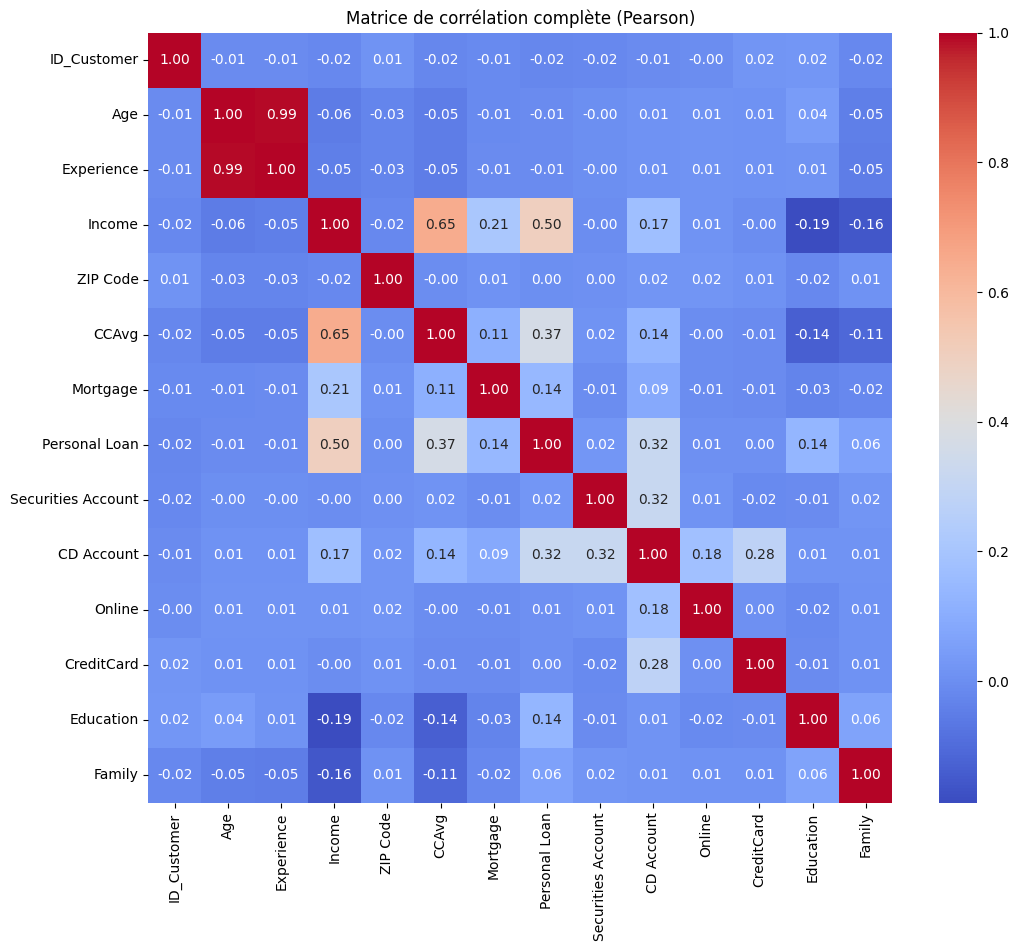

In [11]:
# crée les nouvelles variables combinaison des variables 
# identifier quelles variables influencent ou sont corrélées avec le fait qu'une personne ait obtenu un prêt personnel
# correlation (deux features) , corr 
import seaborn as sns
import matplotlib.pyplot as plt

mat_corr=data.corr(method='pearson', min_periods=1, numeric_only=False)


# 3. Affichage graphique (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(mat_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation complète (Pearson)")
plt.show()

## elle montre la correlation entre les différentes variablesentrées:elles sont bien corrélées entre elles mais la variable zip-code et securities account par exemple ne sont pas corrélées avec les autres entrées.Donc on peut décider ne pas l'utiliser. par contre CD account et personnal loan montre un bonne corrélation. 

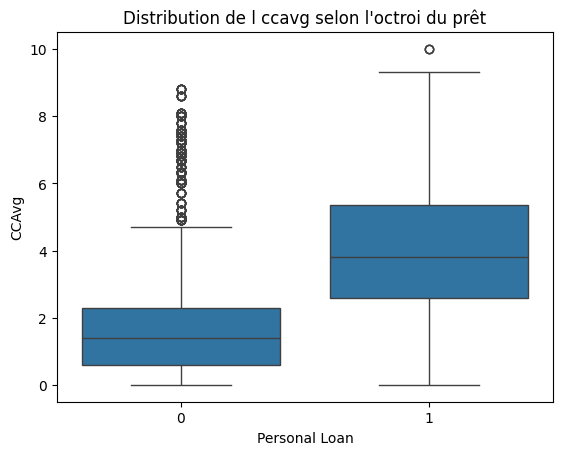

In [12]:
sns.boxplot(x='Personal Loan', y='CCAvg', data=data)
plt.title("Distribution de l ccavg selon l\'octroi du prêt")
plt.show()

## la présence des varibles abérantes qui faussent le modèle et un grand ecart de moyenne entre les deux variables 

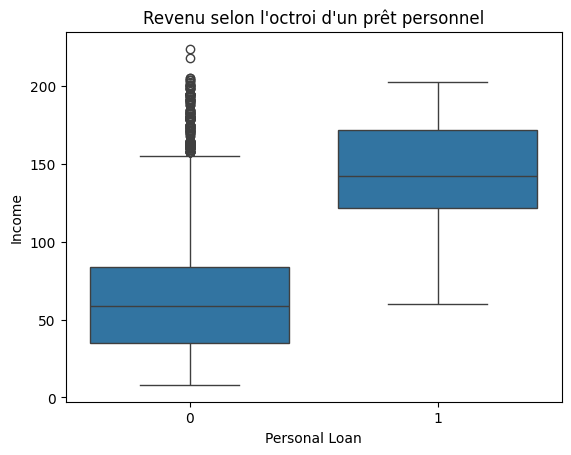

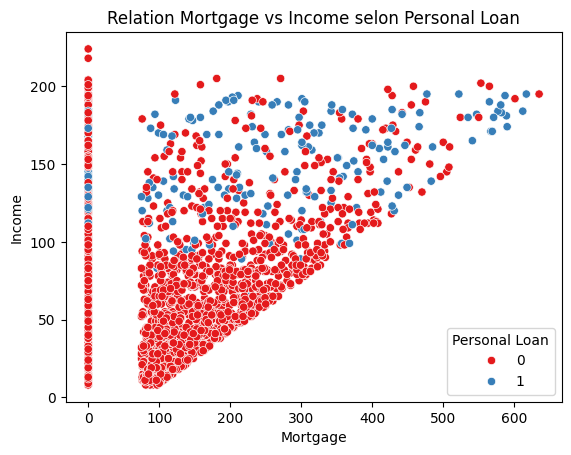

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Personal Loan', y='Income', data=data)
plt.title("Revenu selon l'octroi d'un prêt personnel")
plt.show()

sns.scatterplot(data=data, x='Mortgage', y='Income', hue='Personal Loan', palette='Set1')
plt.title("Relation Mortgage vs Income selon Personal Loan")
plt.show()

## les revenus sont plus élevés pour les personnes avec Personal Loan = 1 Cela signifie que les prêts sont principalement accordés à des personnes à hauts revenus.
## les personal loan sont plus concentrés sur 100 et la dispersion des des hue = 1 montre que la région n'est pas favorable au prêt 
## On observe que les personnes ayant un revenu élevé obtiennent plus souvent un prêt personnel, surtout lorsqu’elles ont déjà un mortgage modéré ou élevé. Cela suggère que la banque accorde les prêts en priorité à des clients ayant une bonne capacité de remboursement (revenu élevé), même s’ils ont déjà un prêt immobilier.

# Methode de regression lineaire

In [82]:
import numpy as np
from sklearn.linear_model import LinearRegression 

# Charger le dataset
data = pd.read_csv(r'C:/Users/cinthia/OneDrive/Bureau/ProjetMachine_learning/Bank_Personal_Loan_Modelling.csv')

X= data.drop('Income', axis=1)
y=data['Income']

# division des données 
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

reg=LinearRegression().fit(X_train,y_train)
reg.score(X_test,y_test)

0.5608665354534919

## Les données sont séparées comme suit 80% pour l'entraînement (X_train, y_train) et 20% pour le test (X_test, y_test) le random_state=42 permet de reproduire les résultat sur score de r*2=0.56 explique que 56% de revenu des clients est estimé avec les différentes variables entrées. d'ou le modèle n'est pas fiable et environ 56.9 % de la variance du revenu dans les données test.

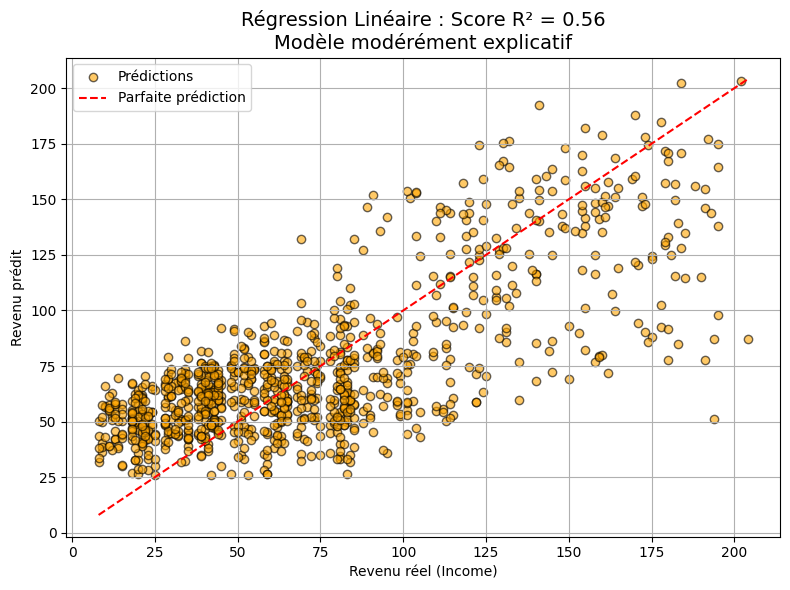

In [64]:
y_pred = reg.predict(X_test)
r2 = reg.score(X_test, y_test)

# Tracer les valeurs réelles vs. prédites
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='orange', alpha=0.6, edgecolor='k', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Parfaite prédiction')
plt.title(f"Régression Linéaire : Score R² = {r2:.2f}\nModèle modérément explicatif", fontsize=14)
plt.xlabel("Revenu réel (Income)")
plt.ylabel("Revenu prédit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# méthodes ensemblistes 
## Le baggingRegresssor  

In [66]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

X= data.drop('Income', axis=1)
y=data['Income']

# division des données 
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Score R² ) : 0.51


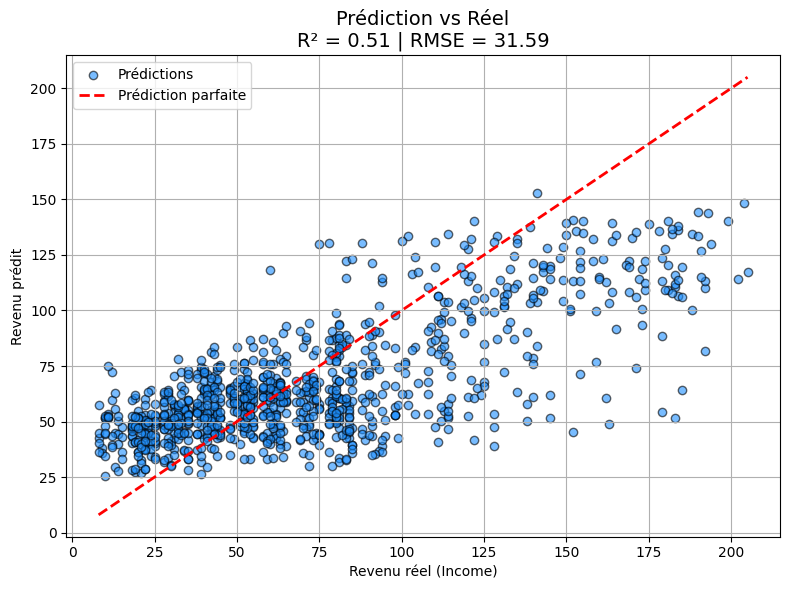

In [67]:

reg = BaggingRegressor(estimator=SVR(), n_estimators=10, random_state=0)
reg.fit(X_train_scaled, y_train)

# Prédictions
y_pred = reg.predict(X_test_scaled)

# Évaluation
score = r2_score(y_test, y_pred)
print(f"Score R² ) : {score:.2f}") 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Figure
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue', edgecolors='k', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Prédiction parfaite')
plt.title(f'Prédiction vs Réel\nR² = {r2:.2f} | RMSE = {rmse:.2f}', fontsize=14)
plt.xlabel('Revenu réel (Income)')
plt.ylabel('Revenu prédit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Méthode stacking

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Division des données
X = data.drop('Income', axis=1)
y = data['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Définition du modèle stacking
estimators = [
    ('ridge', Ridge()),
    ('dt', DecisionTreeRegressor()),
    ('knn', KNeighborsRegressor())
]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10, random_state=42)
)


StackingRegressor score: 0.8150064798945187


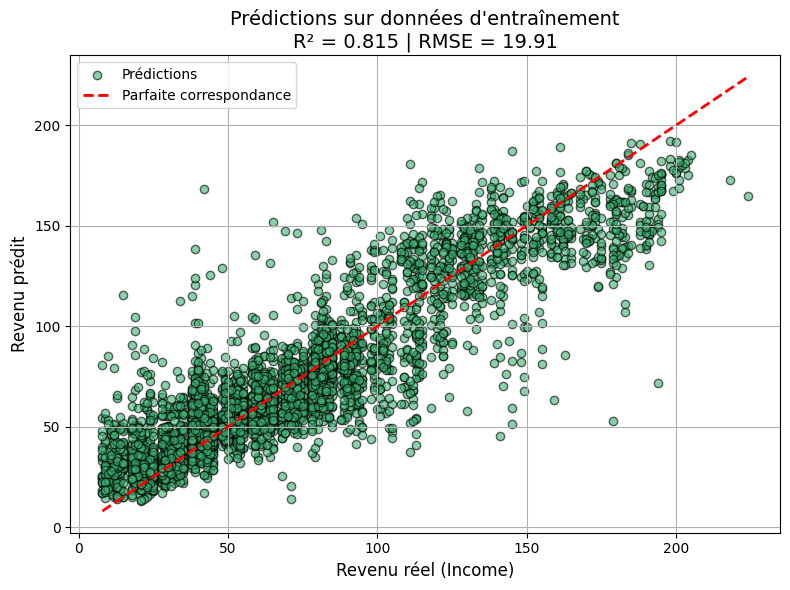

In [74]:

# Entraînement et score sur X_train
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
score = r2_score(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("StackingRegressor score:", score)

# Affichage figure : vraies vs. prédites
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred, alpha=0.6, edgecolors='k', color='mediumseagreen', label="Prédictions")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label="Parfaite correspondance")
plt.xlabel("Revenu réel (Income)", fontsize=12)
plt.ylabel("Revenu prédit", fontsize=12)
plt.title(f"Prédictions sur données d'entraînement\nR² = {score:.3f} | RMSE = {rmse:.2f}", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Methode de SVM(support vector machine) 

In [75]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt



X= data.drop('Income', axis=1)
y=data['Income'] 

# division des données 
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 1. Entraînement du modèle SVR avec noyau RBF (par défaut)
svr = SVR(kernel='rbf', C=10, epsilon=0.01)  # C=100 donne plus de flexibilité au modèle
svr.fit(X_train_scaled, y_train)

# 2. Prédictions
y_pred = svr.predict(X_test_scaled)

In [76]:

# 3. Évaluation du modèle
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² : {r2:.4f}")
print(f"RMSE : {rmse:.2f}")


R² : 0.5949
RMSE : 28.64


## un résultat d'environ 59,5 % de la variance du revenu des clients à partir des variables d’entrées.  ce résultat n'est pas très meilleur pour un jeu de données réel. 
## une erreur quadratique moyenne de 28.64 donne une prédiction moyenne sur les revenus des clients. Ainsi plus cette erreur est petit plus le modèle est fiable 

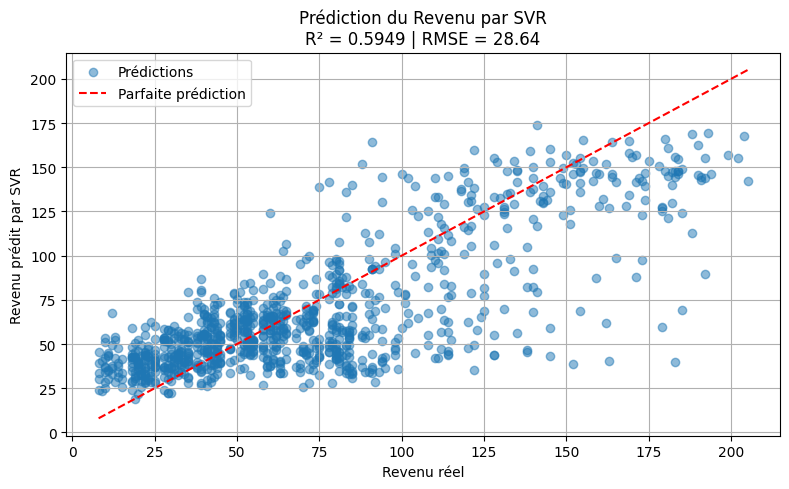

In [77]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5, label="Prédictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Parfaite prédiction")
plt.xlabel('Revenu réel')
plt.ylabel('Revenu prédit par SVR')
plt.title(f'Prédiction du Revenu par SVR\nR² = {r2:.4f} | RMSE = {rmse:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##  le points représentent un client potentiel avec sa vraie valeur de revenu et la prédiction associée. la ligne rouge représente la prédiction parfaite pour nos jeu de donées la présence des points bleux autour de celle-ci signifierait que lemodèle prédit exactement les vraies valeurs. 
## dans l'intervalle de [5 80] nous observons que les valeurs prédictes sont plus proche de la courbe de valeurs réelles ce qui montre la prédiction de l'éligibité en fonction de des revenus réels se rapproche plus des valeurs réelles. Or dans l'intervalle [90 200] la prédiction 

In [69]:
# 1. Entraînement du modèle SVR avec noyau RBF (par défaut)
svr = SVR(kernel='linear', C=10, epsilon=0.01)  # C=100 donne plus de flexibilité au modèle
svr.fit(X_train_scaled, y_train)

# 2. Prédictions
y_pred = svr.predict(X_test_scaled)


# 3. Évaluation du modèle
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² : {r2:.4f}")
print(f"RMSE : {rmse:.2f}")


R² : 0.5040
RMSE : 31.69


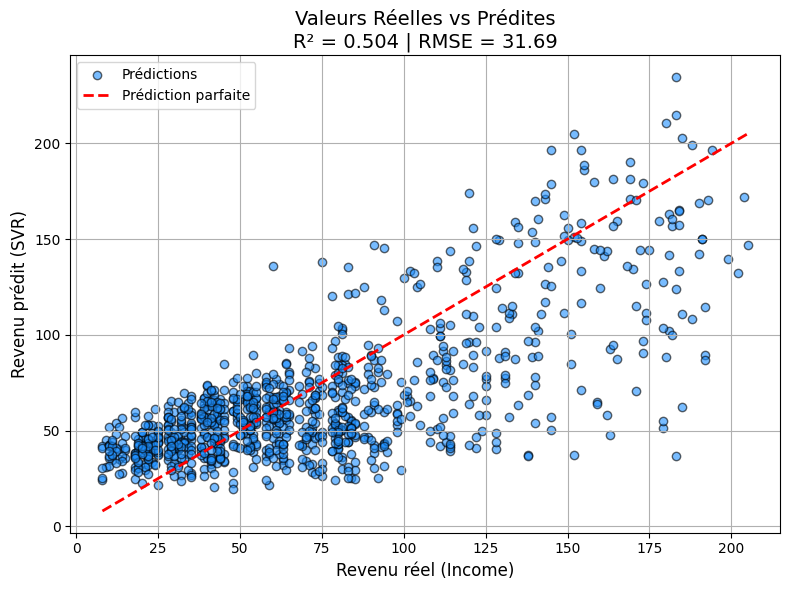

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Supposons que y_test et y_pred sont déjà définis comme dans ton code
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Figure
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', edgecolors='k', alpha=0.6, label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Prédiction parfaite')
plt.title(f'Valeurs Réelles vs Prédites\nR² = {r2:.3f} | RMSE = {rmse:.2f}', fontsize=14)
plt.xlabel('Revenu réel (Income)', fontsize=12)
plt.ylabel('Revenu prédit (SVR)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
